<a href="https://colab.research.google.com/github/RohanBS/DS_FlashChallenge1/blob/main/START_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

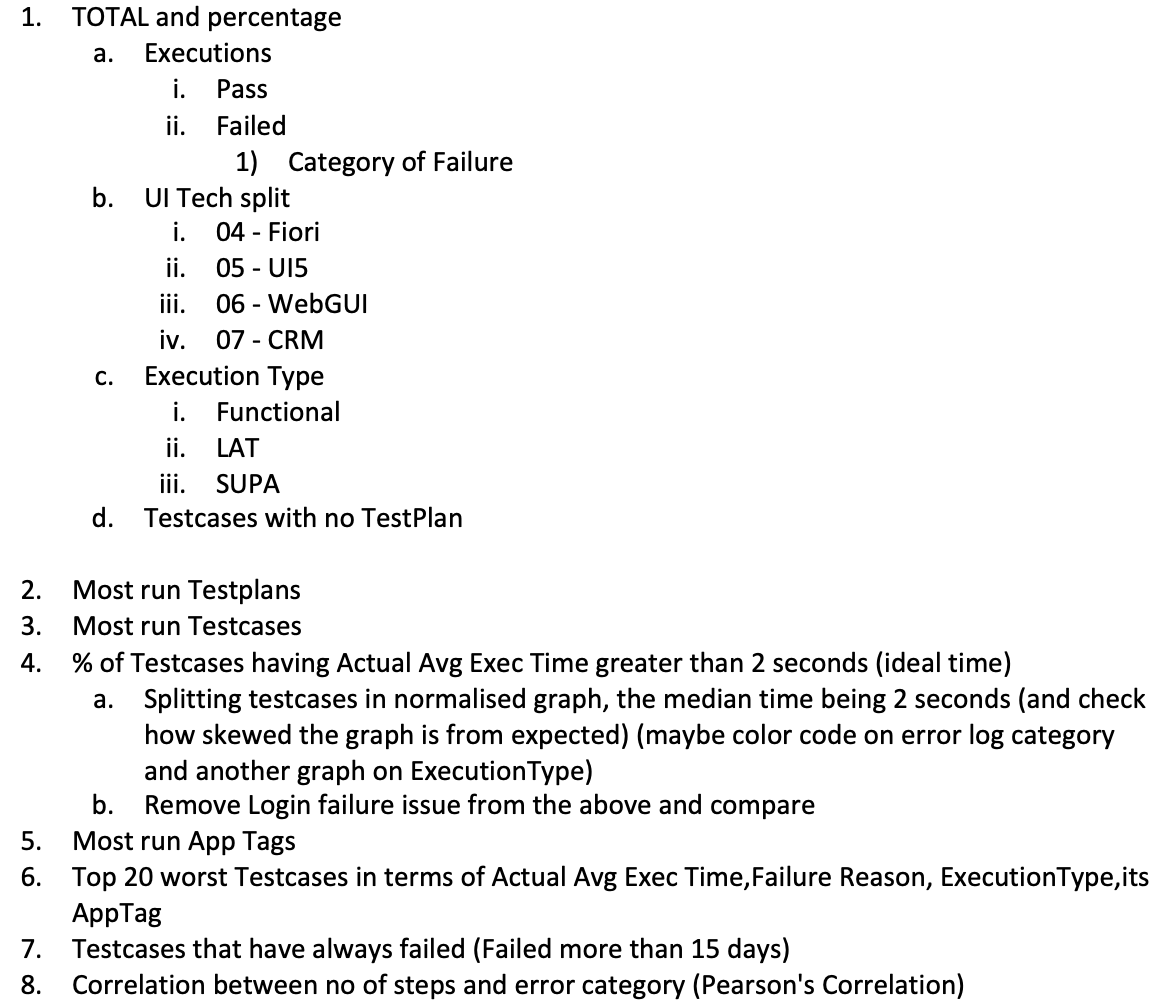

In [2]:
import pandas as pd

In [3]:
df_april= pd.read_csv("April 2022.csv")
df_april["month"] = "april"
df_may= pd.read_csv("May_2022.csv")
df_may["month"] = "may"
df_june= pd.read_csv("June_2022.csv")
df_june["month"] = "june"
df_all = pd.concat([df_april, df_may, df_june])


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,3,6,7,8,9,10,11,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# print(df_all.head(3))
len(df_all)
print("Total number of executions done in 3 months : April, May and June 2022 : ", len(df_all))

Total number of executions done in 3 months : April, May and June 2022 :  2091371


## Plot depicting TOTAL percentage of PASSED and Failures due to some reason on an aggregate for the months April, May and June

### Takeaway: Almost 50% of the scripts have failed due to some reason for which we do analysis of each Failure categories below

53.58647509217638
46.41352490782362


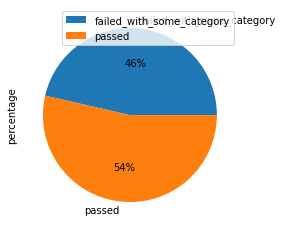

In [7]:
import matplotlib.pyplot as plt
passed  = (df_all["Error Log Category"] == 'PASSED').sum()
total = len(df_all)
failed_with_some_category = total - passed
percent_passed = passed / total * 100
percent_failed = 100 - percent_passed
print(percent_passed)
print(percent_failed)
x = ['passed','failed_with_some_category']
y = [percent_passed,percent_failed]
dataframe = pd.DataFrame({"category":x,"percentage":y})
dataframe.groupby(['category']).sum().plot(kind='pie', y='percentage', autopct='%1.0f%%')

## Analysis of each Failure categories are shown below (Excluding PASSED)

### Takeaway: 
1. There is still a greater chunk Not categorised
2. Top 5 Error Categories are (in decreasing order):
  - Login Failure
  - Re-execution Required
  - CustomControl issue
  - Element Not Found
  - Custom Specific Configuration

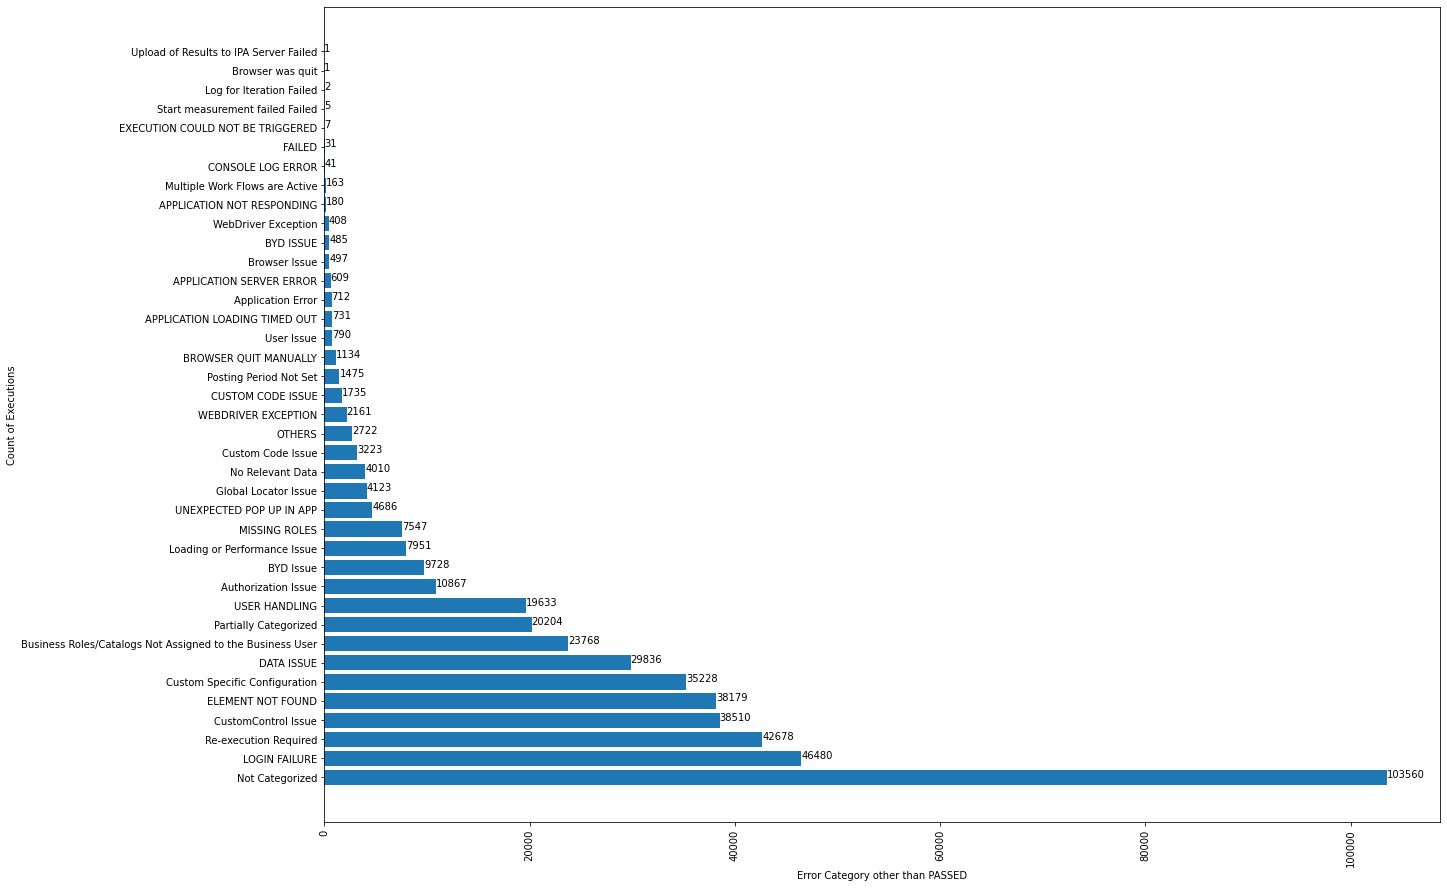

In [8]:
category_info = df_all['Error Log Category'].value_counts()
x = ["Not Categorized","LOGIN FAILURE","Re-execution Required","CustomControl Issue","ELEMENT NOT FOUND","Custom Specific Configuration","DATA ISSUE","Business Roles/Catalogs Not Assigned to the Business User","Partially Categorized","USER HANDLING","Authorization Issue","BYD Issue","Loading or Performance Issue","MISSING ROLES","UNEXPECTED POP UP IN APP","Global Locator Issue","No Relevant Data","Custom Code Issue","OTHERS" ,"WEBDRIVER EXCEPTION","CUSTOM CODE ISSUE","Posting Period Not Set","BROWSER QUIT MANUALLY","User Issue","APPLICATION LOADING TIMED OUT","Application Error","APPLICATION SERVER ERROR","Browser Issue","BYD ISSUE","WebDriver Exception","APPLICATION NOT RESPONDING","Multiple Work Flows are Active","CONSOLE LOG ERROR","FAILED","EXECUTION COULD NOT BE TRIGGERED","Start measurement failed Failed","Log for Iteration Failed","Browser was quit","Upload of Results to IPA Server Failed"]
y = category_info.to_list()[1:]

plt.rcParams["figure.figsize"] = (20,15)
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.xticks(rotation=90)
plt.xlabel("Error Category other than PASSED")
plt.ylabel("Count of Executions")
# plt.title("")
plt.savefig('fig1.pdf')
plt.show()
# category_info

## Below are the list of the top 30 TestPlans and Testcases executed in Cumulative Executions data of April, May and June 2022

### NOTE: I will also update this with the data of "Success Rate" of these executions to give us more insights. Will keep it updated in a github link 

In [9]:
top30_testplan_executed = df_all['Test Plan'].value_counts().nlargest(30)
top30_testplan_executed

S4HCE_2202_HFE_VP_Procure_WDF15         93214
S4HCE_2202_HFE_HFCF_Procure_WDF15       47643
FICA_START_SCRIPT_CC3_721               39250
S4HCE_2202_HFE_SOI_Procure_WDF15        32961
FICA_START_SCRIPT_CCF_721               27034
S4C_START_SCRIPTS_TESTPLAN              15925
S4C_API_AUT                             15368
Z_AFC_FullScope                         14064
S4H_PS_CE_1NT_DEV_REGRESSION            13564
S4HCE_2208_DEV_DRTX_PRODUCE             12437
S4H_CE_2102_START_SCRIPT_FICA           10806
S4HCE_2208_DEV_DRT_Procure_WDF17        10495
CLM_AM_SPC_SNP_CDM_SERVICE_EXECUTION    10015
17_PIN_CAPEX_Automation_DEV              9754
S4HCE_2208_DEV_DRTX_SD1                  9701
IES_2205_CL_DLAB_T2R                     9259
S4HCE_2202_HFE_DRTX_SD1                  8516
S4HCE_2202_HFE_DRTX_Produce2             8369
FIX_FAL_GENERIC_TESTPLAN_PRODUCTION      7394
S4HANA_IME_START_EXEC_CE2208_MM-INT      7198
S4HCE_2208_DEV_DRTX_SD2                  7139
CLM_AM_SPC_SNP_MASTER_PLAN        

In [11]:
top30_testcases_executed = df_all['Testcase Name'].value_counts().nlargest(30)
top30_testcases_executed

S4H_F0337_MANAGE_PURCAT_CR        25582
PS_SAP_BR_GL_ACCOUNTAN_CCW_715    18016
S4H_F2192_ACTIVITIES_CR           12945
S4H_F2192_MANAGE_ACTIVITY_CR      12880
S4H_F1576_CE1702_VIEW_QNRRESP     12722
S4H_F1649_CE1702_SRCH_MONIRESP    12714
S4H_F2191_CE1702_SRCH_SCORECAR    12713
S4H_F1650_CE1702_SRCH_EVLSUP      12701
S4H_F2198_CE1702_SRCH_TRANSTMP    12686
S4H_F2193_CE1702_SRCH_MNGTEMP     12599
S4H_F2194_CE1702_SRCH_MNGQNAIR    12598
S4H_F2199_CE1702_SRCH_TRANSQNR    12583
S4H_F2192_MANGE_ACTIVITY_DEL      12436
S4H_F2197_TRANSLATE_PURCAT_SRC    11605
SSUITE_F0780_CPM_INFO              4466
S4HCE_CARRIER_CR                   4092
S4C_API_CREATE_SO_ROLE             3594
IES_H2R_HIRE_NEW_EMPLOYEE_         3563
S4H_F3215_PC_PROJ_CR               3492
SSUITE_F0780_CPM_INFO_2            3450
IES_H2R_S4_CR_COSTCENTER           3301
IES_H2R_HIRE_NEW_EMP_SCL           3159
CREATE_SALES_QUOTATION             3093
IES_H2R_CWK_HIRE_NEW               3050
S4C_API_CREATE_COM_ARG             2832


## Converting the data in the desired form to compute the below calculations

In [12]:
df_all['Actual Avg Exec Time(secs)'] = df_all['Actual Avg Exec Time(secs)'].apply(pd.to_numeric, errors='coerce')

## Percentage of Testcases where Actual Avg Exec Time is more than the ideal 2 seconds 
### Takeaway:
1. We have almost 60% of our Testcases executing within the ideal time of 2 seconds
2. We still have to analyse the remaining 40% of Testcases

In [13]:
count = df_all['Actual Avg Exec Time(secs)'][df_all['Actual Avg Exec Time(secs)'] > 2.0].count()
print("No of Testcases where Actual Avg Exec Time is more than 2 seconds (ideal) :",count)
percentage_execution_greater2 = count/len(df_all) *100
print("This constitutes", percentage_execution_greater2, " of total executions")

No of Testcases where Actual Avg Exec Time is more than 2 seconds (ideal) : 858256
This constitutes 41.037960266255965  of total executions


## Analysis of App Tags

Creating a new data frame with the desired Columns
1. Have removed those rows where Error Log Category was NA

In [14]:
# df_all.rename(columns = {'App Tag','app_tag'}, inplace =True)
# print(df_all.columns.tolist()) 
df_new = df_all[['Testcase Name','Error Log Category','Executed on Date','UI Tech','App Tag']]
df_new = df_new[df_new['Error Log Category'].notna()]
g = df_new.groupby('App Tag')

In [15]:
# appTagInfo.describe()
g


In [16]:
app_tag = []
error_cat_passed_count = []
error_cat_failed_with_some_reason_count = []

for x,y in g:
  passed,failed = 0, 0
  # print(x)
  app_tag.append(x)
  # print(y)
  for index, row in y.iterrows():
    if row['Error Log Category'] != 'PASSED':
      failed += 1
    else:
      passed += 1
  error_cat_passed_count.append(passed)
  error_cat_failed_with_some_reason_count.append(failed)
  
print(len(app_tag))
print(len(error_cat_passed_count))
print(len(error_cat_failed_with_some_reason_count))
print(app_tag)
print(error_cat_passed_count)
print(error_cat_failed_with_some_reason_count)

6080
6080
6080
['%2fECRS%2fRP_EDIT;/ECRS/RP_EDIT;', '%2fPLMU%2fWDA_SPC_FESP_MAINT_OIF_AC;', '%2fSHCM%2fCHANGE_LOGS;/SHCM/CHANGE_LOGS;', '%2fSHCM%2fORG_REPL_QUERY;/SHCM/ORG_REPL_QUERY;', '*%2fSAPAPO%2fRPT%20%2FSAPAPO%2FCDPS_EINT_D3100_STR-VRSIOID%3d000%3bDYNP_OKCODE%3d%3DEXECUTE%3bRS_NAME-LOW%3dWMTSJ_R1_MTSJ_001;CRPResource-monitor;', '*OLR3_CJ20N%20DYNP_OKCODE%3dDISP%3bOLR3_R3_TS_SEL_OBJ-PSPID%3d0991-PROJECT1;MajorAssemblyProject-manage;CJ20N;', '*VA03%20DYNP_NO1ST%3d1%3bDYNP_OKCODE%3dENT2%3bVBAK-VBELN%3d13;VA03;SalesOrder-manage;', '*VA22%20DYNP_NO1ST%3d1%3bDYNP_OKCODE%3dENT2%3bVBAK-VBELN%3d20000025;SalesQuotation-manage;VA22;', '/CEECV/11001117;CloudSolution-manage;CloudSolution-administer;IMGActivity-execute;', '/CEECV/11001117;CloudSolution-manage;CloudSolution-administer;IMGActivity-execute;S000;', '/CEECV/11001118;CloudSolution-manage;CloudSolution-administer;IMGActivity-execute;', '/CEECV/11001118;CloudSolution-manage;CloudSolution-administer;IMGActivity-execute;S000;', '/CEECV/

In [35]:
df_appTag = pd.DataFrame(list(zip(app_tag,error_cat_passed_count,error_cat_failed_with_some_reason_count)), columns =['app_tag', 'passed','failed'])

In [24]:
print(error_cat_failed_with_some_reason_count)

[18, 12, 14, 13, 1, 3, 1, 1, 2, 6, 1, 6, 0, 2, 1, 1, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 27, 42, 11, 56, 0, 14, 1, 2, 26, 0, 19, 80, 13, 25, 5, 151, 42, 124, 25, 17, 5, 62, 431, 15, 1, 44, 46, 54, 20, 0, 13, 8, 5, 5, 123, 89, 9, 15, 181, 3, 245, 16, 2, 0, 5, 83, 19, 1, 2, 27, 0, 259, 26, 58, 0, 0, 42, 18, 17, 52, 3, 2, 153, 10, 371, 131, 143, 235, 16, 668, 61, 143, 4, 322, 98, 21, 33, 15, 20, 1, 10, 234, 1, 0, 2, 49, 1, 12, 7, 50, 18, 28, 218, 17, 277, 7, 49, 5, 245, 16, 27, 45, 87, 7, 65, 2, 746, 1, 396, 58, 20, 175, 97, 9, 144, 86, 159, 53, 45, 12, 8, 77, 252, 12, 26, 84, 108

In [ ]:
# df_appTag = pd.DataFrame({"app_tag":app_tag,"passed":error_cat_passed_count,"failed":error_cat_failed_with_some_reason_count})
# convert_dict = {'passed': int,
#                 'failed': int }  
  
# df_appTag = df_appTag.astype(convert_dict)
# # df_appTag['passed'] = df_appTag['passed'].apply(pd.to_numeric, errors='coerce')
# # df_appTag['failed'] = df_appTag['failed'].apply(pd.to_numeric, errors='coerce')
# print(type(df_appTag['passed']))
# print(type(df_appTag['failed']))

#   # diff = []
#   # d = 0
#   # for index, row in df_appTag.iterrows():
#   #   d = abs(row[passed] - row[failed])
#   #   diff.append(d)
#   # df_appTag["diff"] = diff
#   # df_appTag.head(10)

    

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [26]:
df_appTag.head(5)
for col in df_appTag.columns:
    print(col)

print(df_appTag["failed"])

app_tag
passed
failed
0        18
1        12
2        14
3        13
4         1
       ... 
6075     21
6076    373
6077      6
6078     60
6079      0
Name: failed, Length: 6080, dtype: int64


In [36]:
diff = []
total = []
d = 0
fail_percentage = []
diff_percentage = []
for index, row in df_appTag.iterrows():
  d = abs(row["passed"] - row["failed"])
  t = row["passed"] + row["failed"]
  diff_p = d / t * 100
  fail_p = row["failed"] / t * 100
  diff.append(d)
  total.append(t)
  diff_percentage.append(diff_p)
  fail_percentage.append(fail_p)
df_appTag["diff"] = diff
df_appTag["total"] = total
df_appTag["fail_percentage %"] = fail_percentage
df_appTag["diff_percentage %"] = diff_percentage
df_appTag.head(10)

,app_tag,passed,failed,diff,total,fail_percentage %,diff_percentage %
0,%2fECRS%2fRP_EDIT;/ECRS/RP_EDIT;,0,18,18,18,100.000000,100.000000
1,%2fPLMU%2fWDA_SPC_FESP_MAINT_OIF_AC;,23,12,11,35,34.285714,31.428571
2,%2fSHCM%2fCHANGE_LOGS;/SHCM/CHANGE_LOGS;,0,14,14,14,100.000000,100.000000
3,%2fSHCM%2fORG_REPL_QUERY;/SHCM/ORG_REPL_QUERY;,0,13,13,13,100.000000,100.000000
4,*%2fSAPAPO%2fRPT%20%2FSAPAPO%2FCDPS_EINT_D3100...,0,1,1,1,100.000000,100.000000
5,*OLR3_CJ20N%20DYNP_OKCODE%3dDISP%3bOLR3_R3_TS_...,0,3,3,3,100.000000,100.000000
6,*VA03%20DYNP_NO1ST%3d1%3bDYNP_OKCODE%3dENT2%3b...,0,1,1,1,100.000000,100.000000
7,*VA22%20DYNP_NO1ST%3d1%3bDYNP_OKCODE%3dENT2%3b...,0,1,1,1,100.000000,100.000000
8,/CEECV/11001117;CloudSolution-manage;CloudSolu...,9,2,7,11,18.181818,63.636364
9,/CEECV/11001117;CloudSolution-manage;CloudSolu...,16,6,10,22,27.272727,45.454545


In [40]:
final_df = df_appTag.sort_values(by=['fail_percentage %','total'], ascending=False)

In [43]:
final_df

,app_tag,passed,failed,diff,total,fail_percentage %,diff_percentage %
1460,CustomBusinessObject-develop;,0,614,614,614,100.0,100.0
709,CACreditWorthiness-manage;,0,578,578,578,100.0,100.0
2019,FPE2;,0,550,550,550,100.0,100.0
2017,FPDPR_BP_SIM;,0,539,539,539,100.0,100.0
2034,FPG1;,0,539,539,539,100.0,100.0
...,...,...,...,...,...,...,...
6016,WR60;,1,0,1,1,0.0,100.0
6017,WRMO;,1,0,1,1,0.0,100.0
6063,buildcoverage-build;,1,0,1,1,0.0,100.0
6068,maintainmapping-mapping;,1,0,1,1,0.0,100.0
